In [2]:
import pandas as pd
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.options.display.max_columns = 99
pd.options.display.max_rows = 999

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from IPython.display import Markdown as md



In [4]:
frac = 0.01
radio_ref = pd.read_csv('./../data/info/radio_ref.csv')

In [9]:
# data.Grupo_Etario_INDEC.value_counts()
data.columns

Index(['RADIO_REF_ID', 'URP', 'DPTO', 'HOGAR_REF_ID', 'H15', 'H16',
       'PERSONA_REF_ID', 'P02', 'P03', 'P09', 'P10', 'CONDACT', 'IX_TOT',
       'CAT_OCUP', 'CAT_INAC', 'INGRESO', 'INGRESO_NLB', 'INGRESO_JUB',
       'INGRESO_SBS', 'PP07K', 'P47T_persona', 'ANO4', 'Q', 'P0910',
       'Grupo_Etario_3', 'Grupo_Etario_INDEC', 'Grupo_Etario_q10',
       'P47T_hogar', 'CBA', 'CBT', 'CB_EQUIV', 'Pobreza', 'Indigencia',
       'gap_pobreza', 'gap_indigencia', 'IDFRAC', 'PROV', 'NOMPROV',
       'AGLOMERADO', 'Region'],
      dtype='object')

In [163]:
# data = pd.read_csv('./../data/Pobreza/pobreza_'+str(frac)+'_2019-2020.csv')#.sample(frac = .1)
data = pd.read_csv('/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_20212.csv')#.sample(frac = .2)
data['AGLO_si'] = data.AGLOMERADO != 0


In [164]:

# ## Coversion a pesos de AGO 20, cuando fue elaborado el informe de INDEC
# cpi = pd.read_csv('./../data/info/indice_precios_d.csv', index_col=0)
cpi_d = pd.read_csv('https://raw.githubusercontent.com/matuteiglesias/IPC-Argentina/main/data/info/indice_precios_d.csv', index_col=0)
cpi_d.index = pd.to_datetime(cpi_d.index)

# from datetime import datetime
# hoy = datetime.today().strftime('%Y-%m-%d')
semestre = '2021-10-01'

# Ratio de precios de hoy con respecto a precios con indice en base modelo
index = cpi_d['index']
ix = index.loc[semestre]/index.loc['2016-01-15']
# ix = index.loc['2022-03-15']/index.loc['2016-01-15']
print(ix)
# ix = cpi.loc['2020-09-30'].values[0]/cpi.loc['2016-01-01'].values[0] # Precios del periodo en estudio

columnas_pesos =  ['P47T_persona', 'P47T_hogar', 'CBA', 'gap_indigencia', 'CBT', 'gap_pobreza']
data[columnas_pesos] = ix*data[columnas_pesos]


6.937015732618513


In [165]:
info = data.loc[data.Pobreza][['HOGAR_REF_ID', 'Q','CBA', 'CBT', 'CB_EQUIV']].drop_duplicates()
# info = data[['HOGAR_REF_ID', 'Q','CBA', 'CBT', 'CB_EQUIV']].drop_duplicates()
info['CBA_0'] = info['CBA']/info['CB_EQUIV']
info['CBT_0'] = info['CBT']/info['CB_EQUIV']
info.groupby('Q').agg(['mean', 'std'])

HOGAR_REF_ID                         CBA                \
                    mean           std          mean           std   
Q                                                                    
2021-08-15  6.699645e+06  3.333019e+06  31804.271592  15146.448171   
2021-11-15  6.885362e+06  3.283910e+06  31490.016707  16231.023978   

                     CBT                CB_EQUIV                  CBA_0  \
                    mean           std      mean       std         mean   
Q                                                                         
2021-08-15  74013.680963  35365.387072  3.341217  1.608849  9552.309651   
2021-11-15  72876.939287  37702.637164  3.343077  1.727402  9448.122061   

                               CBT_0               
                   std          mean          std  
Q                                                  
2021-08-15  538.972904  22267.829148  1999.019937  
2021-11-15  532.479689  21904.642435  2011.619719

# Incidencia de la pobreza y la indigencia en 31 aglomerados urbanos
## Segundo semestre de 2020

In [166]:
print('Todos los valores en pesos argentinos (ARS) del '+semestre+' (aaaa-mm-dd)')
print('Fuente del dato primario: INDEC, www.indec.gob.ar')

Todos los valores en pesos argentinos (ARS) del 2021-10-01 (aaaa-mm-dd)
Fuente del dato primario: INDEC, www.indec.gob.ar


In [167]:
img = mpimg.imread('./../images/indec_pobreza_template.png')

In [168]:
n_ = data.groupby(['AGLO_si'])[['HOGAR_REF_ID', 'PERSONA_REF_ID']].nunique()/frac
n_

,HOGAR_REF_ID,PERSONA_REF_ID
AGLO_si,,
False,4931000.0,16718500.0
True,8689700.0,28194000.0


In [169]:
n_trims = 2
frac = 0.01

# variables
n_hogares_eph = n_.loc[True]['HOGAR_REF_ID']
n_personas_eph = n_.loc[True]['PERSONA_REF_ID']

# data_sel = data.loc[(data.AGLO_si) & (data.Q.isin(['2020-02-15', '2020-05-15']))]
data_sel = data.loc[(data.AGLO_si)]

## Pobreza
pob_cnt = (data_sel.groupby(['Pobreza', 'Q'])[['PERSONA_REF_ID', 'HOGAR_REF_ID']].nunique()/frac)  ## ojo porque mal groupby Q suma hogares que puedieron ser pobres en distintos trimestres
pob_cnt = pob_cnt.groupby(level = 'Pobreza').mean()
pob_pct = pob_cnt/pob_cnt.sum()

## Indigencia
idg_cnt = (data_sel.groupby(['Indigencia', 'Q'])[['PERSONA_REF_ID', 'HOGAR_REF_ID']].nunique()/frac)  ## ojo porque mal groupby Q suma hogares que puedieron ser pobres en distintos trimestres
idg_cnt = idg_cnt.groupby(level = 'Indigencia').mean()
idg_pct = idg_cnt/idg_cnt.sum()

## Pobres no Indigentes
pni_cnt = (data_sel.groupby(['Indigencia', 'Pobreza', 'Q'])[['PERSONA_REF_ID', 'HOGAR_REF_ID']].nunique()/frac)  ## ojo porque mal groupby Q suma hogares que puedieron ser pobres en distintos trimestres
pni_cnt = pni_cnt.groupby(level = ['Pobreza','Indigencia']).mean()
pni_pct = pni_cnt/pni_cnt.sum()

# idg_cnt = idg_cnt.groupby(level = 'Indigencia').mean()
# idg_pct = idg_cnt/idg_cnt.sum()


# h_pob_cnt.round(-4).astype(int).unstack()

# ### Porcentaje
# n_trims*(100*h_pob_cnt/h_pob_cnt.sum()).round(1).unstack()

In [170]:

# Tamaño promedio del hogar POBRE
pob_ix_tot = data_sel.loc[data_sel.Pobreza].groupby(['HOGAR_REF_ID', 'Q']).size().mean()
pob_ad_eq = data_sel.loc[data_sel.Pobreza].groupby(['HOGAR_REF_ID', 'Q'])['CB_EQUIV'].first().mean()

# 'Ingreso total familiar promedio' y 'Canasta básica total promedio del hogar' POBRE
pob_ITF = data_sel.loc[data_sel.Pobreza][['HOGAR_REF_ID', 'P47T_hogar', 'CBT', 'gap_pobreza']].drop_duplicates().drop('HOGAR_REF_ID', axis = 1).median()
# pob_ITF = pob_ITF/ix


# Tamaño promedio del hogar INDIGENTE
idg_ix_tot = data_sel.loc[data_sel.Indigencia].groupby(['HOGAR_REF_ID', 'Q']).size().mean()
idg_ad_eq = data_sel.loc[data_sel.Indigencia].groupby(['HOGAR_REF_ID', 'Q'])['CB_EQUIV'].first().mean()

# 'Ingreso total familiar promedio' y 'Canasta básica total promedio del hogar' INDIGENTE
idg_ITF = data_sel.loc[data_sel.Indigencia][['HOGAR_REF_ID', 'P47T_hogar', 'CBA', 'gap_indigencia']].drop_duplicates().drop('HOGAR_REF_ID', axis = 1).median()
# idg_ITF = idg_ITF/ix


In [171]:
#Pobreza
pob_n_h = pob_cnt.loc[True].HOGAR_REF_ID
pob_pct_h = pob_pct.loc[True].HOGAR_REF_ID

pob_n_p = pob_cnt.loc[True].PERSONA_REF_ID
pob_pct_p = pob_pct.loc[True].PERSONA_REF_ID

#Indigencia
idg_n_h = idg_cnt.loc[True].HOGAR_REF_ID
idg_pct_h = idg_pct.loc[True].HOGAR_REF_ID

idg_n_p = idg_cnt.loc[True].PERSONA_REF_ID
idg_pct_p = idg_pct.loc[True].PERSONA_REF_ID

# Pobres no indigentes
pni_n_h = pni_cnt.loc[True, False].HOGAR_REF_ID
pni_pct_h = pni_pct.loc[True, False].HOGAR_REF_ID

pni_n_p = pni_cnt.loc[True, False].PERSONA_REF_ID
pni_pct_p = pni_pct.loc[True, False].PERSONA_REF_ID

# No Pobreza
nopob_n_h = pob_cnt.loc[False].HOGAR_REF_ID
nopob_pct_h = pob_pct.loc[False].HOGAR_REF_ID

nopob_n_p = pob_cnt.loc[False].PERSONA_REF_ID
nopob_pct_p = pob_pct.loc[False].PERSONA_REF_ID

## Ingresos y Canasta
pob_P47T_hogar = pob_ITF.P47T_hogar
pob_CBT = pob_ITF.CBT

idg_P47T_hogar = idg_ITF.P47T_hogar
idg_CBA = idg_ITF.CBA

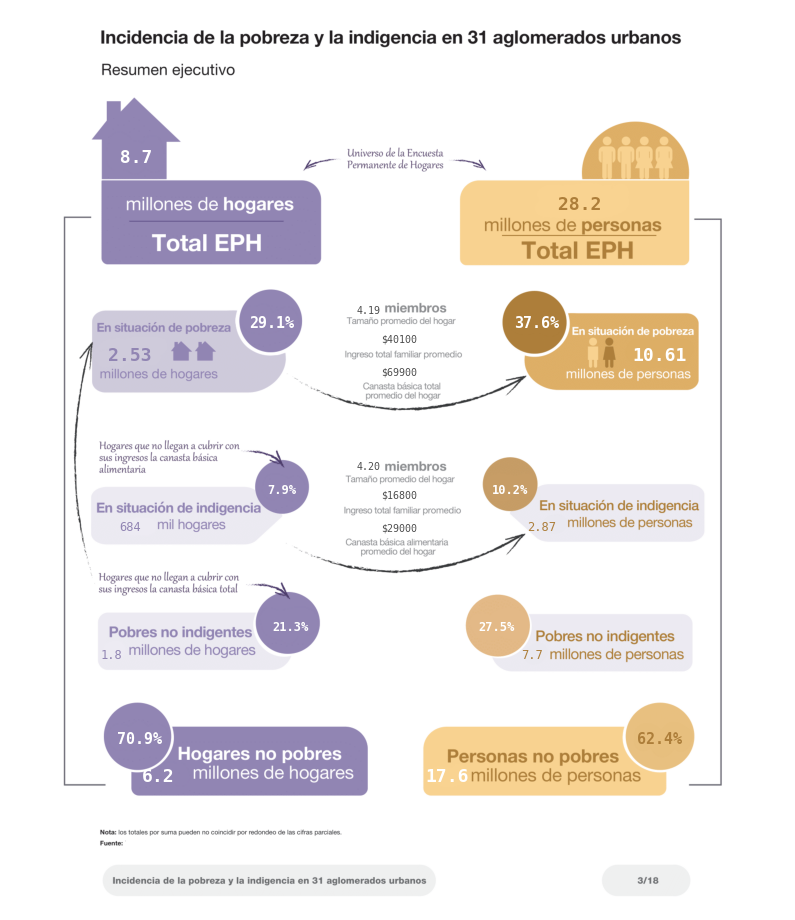

Diseno Grafico: INDEC


In [172]:
family = 'monospace'
# fig, axs = plt.subplots(1, figsize = (20, 30))
fig, axs = plt.subplots(1, figsize = (14, 25))
imgplot = axs.imshow(img)

pr_ = '#9185b3' # purpura oscuro indec
yl_ = '#AD7E3A' # amarillo oscuro indec
# yl_ = '#f7d18f' # amarillo clarito indec

bbox = dict(boxstyle="square", fc='None', ec = 'None')
# n_hogares
axs.annotate(f"{n_hogares_eph/1e6:5.1f}", xy=(250, 750), bbox=bbox, c = 'w', weight='bold', fontsize = 18, ha = 'center', family = family)
# n_personas
axs.annotate(f"{n_personas_eph/1e6:5.1f}", xy=(1200, 850), bbox=bbox, c = yl_, weight='bold', fontsize = 18, ha = 'center', family = family)

##########################################

# n_hogares en pobreza
axs.annotate(f"{pob_n_h/1e6:0.2f}", xy=(260, 1170), bbox=bbox, c = pr_, weight='bold', fontsize = 18, ha = 'center', family = family)
# pct_hogares en pobreza
axs.annotate(f"{pob_pct_h:0.1%}", xy=(560, 1100), bbox=bbox, c = 'w', weight='bold', fontsize = 15, ha = 'center', family = family)

# n_personas en pobreza
axs.annotate(f"{pob_n_p/1e6:0.2f}", xy=(1380, 1170), bbox=bbox, c = 'w', weight='bold', fontsize = 18, ha = 'center', family = family)
# pct_personas en pobreza
axs.annotate(f"{pob_pct_p:0.1%}", xy=(1120, 1100), bbox=bbox, c = 'w', weight='bold', fontsize = 15, ha = 'center', family = family)
##########################################

# Porcentajes indigencia
# pct_hogares en indigencia
axs.annotate(f"{idg_pct_h:0.1%}", xy=(580, 1450), bbox=bbox, c = 'w', weight='bold', fontsize = 12, ha = 'center', family = family)
# pct_personas en indigencia
axs.annotate(f"{idg_pct_p:0.1%}", xy=(1065, 1450), bbox=bbox, c = 'w', weight='bold', fontsize = 12, ha = 'center', family = family)

# numeros indigencia
# n_hogares en indigencia
axs.annotate(f"{idg_n_h/1e3:0.0f}", xy=(260, 1530), bbox=bbox, c = pr_, fontsize = 12, ha = 'center', family = family)
# n_personas en indigencia
axs.annotate(f"{idg_n_p/1e6:0.2f}", xy=(1130, 1530), bbox=bbox, c = yl_, fontsize = 12, ha = 'center', family = family)
##########################################

# Porcentajes PNI
# pct_hogares en PNI
axs.annotate(f"{pni_pct_h:0.1%}", xy=(600, 1740), bbox=bbox, c = 'w', weight='bold', fontsize = 12, ha = 'center', family = family)
# pct_personas en indigencia
axs.annotate(f"{pni_pct_p:0.1%}", xy=(1035, 1740), bbox=bbox, c = 'w', weight='bold', fontsize = 12, ha = 'center', family = family)

# numeros PNI
# n_hogares en PNI
axs.annotate(f"{pni_n_h/1e6:0.1f}", xy=(220, 1800), bbox=bbox, c = pr_, fontsize = 12, ha = 'center', family = family)
# n_personas en PNI
axs.annotate(f"{pni_n_p/1e6:0.1f}", xy=(1110, 1800), bbox=bbox, c = yl_, fontsize = 12, ha = 'center', family = family)

##########################################

# n_hogares NO pobreza
axs.annotate(f"{nopob_n_h/1e6:0.1f}", xy=(320, 2060), bbox=bbox, c = 'w', weight='bold', fontsize = 18, ha = 'center', family = family)
# pct_hogares NO pobreza
axs.annotate(f"{nopob_pct_h:0.1%}", xy=(280, 1980), bbox=bbox, c = 'w', weight='bold', fontsize = 15, ha = 'center', family = family)

# n_personas NO pobreza
axs.annotate(f"{nopob_n_p/1e6:0.1f}", xy=(930, 2060), bbox=bbox, c = 'w', weight='bold', fontsize = 18, ha = 'center', family = family)
# pct_personas NO pobreza
axs.annotate(f"{nopob_pct_p:0.1%}", xy=(1380, 1980), bbox=bbox, c = yl_, weight='bold', fontsize = 15, ha = 'center', family = family)

##########################################

## Ingresos y Canasta
axs.annotate(f"{pob_ix_tot:0.2f}", xy=(790, 1070), bbox=bbox, c = '.3', fontsize = 10, ha = 'right', family = family)
axs.annotate(f"${np.round(pob_P47T_hogar, -2):0.0f}", xy=(830, 1130), bbox=bbox, c = '.3', fontsize = 10, ha = 'center', family = family)
axs.annotate(f"${np.round(pob_CBT, -2):0.0f}", xy=(830, 1200), bbox=bbox, c = '.3', fontsize = 10, ha = 'center', family = family)

## Ingresos y Canasta
axs.annotate(f"{idg_ix_tot:0.2f}", xy=(790, 1400), bbox=bbox, c = '.3', fontsize = 10, ha = 'right', family = family)
axs.annotate(f"${np.round(idg_P47T_hogar, -2):0.0f}", xy=(830, 1460), bbox=bbox, c = '.3', fontsize = 10, ha = 'center', family = family)
axs.annotate(f"${np.round(idg_CBA, -2):0.0f}", xy=(830, 1530), bbox=bbox, c = '.3', fontsize = 10, ha = 'center', family = family)


# pob_CBT = pob_ITF.CBT

# idg_P47T_hogar = idg_ITF.P47T_hogar
# idg_CBA = idg_ITF.CBA

##########################################

plt.ylim(len(img), 420)
plt.axis('off')
plt.show()

print("Diseno Grafico: INDEC")

## Principales resultados de la incidencia de la pobreza y la indigencia

In [90]:

display(md("Los resultados del segundo semestre de 2020 correspondientes al total de aglomerados urbanos registraron que: <br><br>"))
           
display(md("**Incidencia**"))
display(md("El porcentaje de hogares por debajo de la línea de pobreza (LP) alcanzó el {:.1%}".format(pob_pct_h)+"; en estos residen el \
{:.1%}".format(pob_pct_p)+" de las personas. Dentro de este conjunto se distingue un {:.1%}".format(idg_pct_h)+" de hogares por debajo de la \
línea de indigencia (LI), que incluyen al {:.1%}".format(idg_pct_p)+" de las personas. Esto implica que, para el universo de \
los 31 aglomerados urbanos de la EPH, por debajo de la LP se encuentran {:.1f}".format(pob_n_h/1e6)+" millones de hogares que \
incluyen a {:.1f}".format(pob_n_p/1e6)+" millones de personas y, dentro de ese conjunto, {:.1f}".format(idg_n_h/1e3)+" mil hogares se encuentran por debajo \
de la LI, e incluyen a {:.2f}".format(idg_n_p/1e6)+" millones de personas indigentes."))


######################################################################

### Evolucion temporal de la indigencia y pobreza.

display(md("**Evolucion**"))


for i, base_str in enumerate(['H', 'P']):
    print(['Hogares:', 'Personas:'][i])
    grouper = ['Q', 'AGLO_si']
    info = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()
    info = info.loc[info.AGLO_si]
    info['Q'] = pd.to_datetime(info['Q'])

    table = info.loc[info.observable.isin(['Pobreza', 'Indigencia'])].set_index(grouper + ['sintetico', 'observable'])['valor']
    table = table.unstack([-1, -2, -3])
    table = table.groupby(pd.Grouper(level = 0, freq = '6MS')).mean().T

    globals()['evolucion_'+base_str+'_anual'] = table.diff(2, 1).iloc[:, -1]
    globals()['evolucion_'+base_str+'_semes'] = table.diff(1, 1).iloc[:, -1]
    
    table.loc[table.index.get_level_values('sintetico') == 'mean'] = 100*table.loc[table.index.get_level_values('sintetico') == 'mean'].round(3)
    table.loc[table.index.get_level_values('sintetico') == 'sum'] = table.loc[table.index.get_level_values('sintetico') == 'sum'].round(-3).astype(int).astype(str)
    table = table.sort_index(axis = 1)
    display(table)

display(md("En la comparación interanual el porcentaje de hogares en pobreza aumento en {:.1%}".format(evolucion_H_anual.loc[('Pobreza', 'mean', True)])+" p.p. y \
las personas bajo la línea de pobreza, en {:.1%}".format(evolucion_P_anual.loc[('Pobreza', 'mean', True)])+" p.p.; mientras que los hogares indigentes aumentaron \
en {:.1%}".format(evolucion_H_anual.loc[('Indigencia', 'mean', True)])+" y \
las personas bajo la línea de indigencia, en {:.1%}".format(evolucion_P_anual.loc[('Indigencia', 'mean', True)])+" p.p."))


display(md("Con respecto al primer semestre de 2020, se registró un aumento de la pobreza ({:.1%}".format(evolucion_P_semes.loc[('Pobreza', 'mean', True)])+" p.p.) \
mientras que la indigencia registró un aumento ({:.1%}".format(evolucion_P_semes.loc[('Indigencia', 'mean', True)])+" p.p.) para el conjunto de la población cubierta \
por la encuesta."))

    
    
######################################################################

### INGRESOS vs CANASTA a Precios Constantes
display(md("**Canastas - Ingresos**"))

# Dado que la incidencia de la pobreza y la indigencia resulta de la capacidad de los hogares de acceder
# a la canasta básica alimentaria (CBA) y a la canasta básica total (CBT) mediante sus ingresos
# monetarios, y que la brecha es la distancia entre los ingresos y las canastas, se observó que en el
# segundo semestre de 2020:
# Las canastas regionales promedio aumentaron 16,5% (CBA) y 16,2% (CBT). Este incremento en los valores de las
# canastas muestra una desaceleración con respecto al semestre anterior.

info = pd.read_json('./../data/results/result_H_Q-AGLO_si.json').drop('timestamp', axis = 1).drop_duplicates()
info = info.loc[info.AGLO_si]
info = info.loc[info.observable.isin(['P47T_hogar', 'CBA', 'CBT'])]
info['Q'] = pd.to_datetime(info['Q'])
info = info.set_index(['observable', 'sintetico', 'Q'])['valor'].unstack()
info = info.T.groupby(pd.Grouper(level = 0, freq = '6MS')).mean().T


fig, ax = plt.subplots(1, figsize = (8, 4))

x = info.columns
y = info.loc[('P47T_hogar', 'median')].values

barra_10_90 = [ info.loc[('P47T_hogar', 'median')].values  - info.loc[('P47T_hogar', 'q10')].values, 
                    info.loc[('P47T_hogar', 'q90')].values - info.loc[('P47T_hogar', 'median')].values ]
ax.errorbar(x, y, yerr=barra_10_90, fmt='.', c = 'k', lw = 1)

ax.bar(x, height = info.loc[('P47T_hogar', 'q75')].values - info.loc[('P47T_hogar', 'q25')].values,
       bottom = info.loc[('P47T_hogar', 'q25')].values,
       edgecolor = '.5', color = '.9', width = 20, zorder = 2)

ax.plot(info.columns, info.loc[('CBT', 'median')].values, linestyle = '--', label = 'CBT')
ax.plot(info.columns, info.loc[('CBA', 'median')].values, linestyle = '--', label = 'CBA')

ax.legend()
ax.set_ylim(0, 40000)
ax.set_xlim('2018', '2021')
plt.show()

##########################################################################
display(md("**Brecha**"))

display(md("El ingreso total familiar mediano de los hogares pobres fue de $\$${:.0f}".format(np.round(pob_P47T_hogar, -2))+", mientras la CBT mediana del \
mismo grupo de hogares alcanzó los $\$${:.0f}".format(np.round(pob_CBT, -2))+", la brecha mediana de los hogares pobres fue de $\$${:.0f}".format( - np.round(pob_ITF.gap_pobreza, -2))+"."))


display(md("El ingreso total familiar mediano de los hogares indigentes fue de $\$${:.0f}".format(np.round(idg_P47T_hogar, -2))+", mientras la CBA mediana del \
mismo grupo de hogares alcanzó los $\$${:.0f}".format(np.round(idg_CBA, -2))+", la brecha mediana de los hogares indigentes fue de $\$${:.0f}".format( - np.round(idg_ITF.gap_indigencia, -2))+"."))

##########################################################################
display(md("**Grupos de Edad**"))

info = pd.read_json('./../data/results/result_PAGLO_Q-Grupo_Etario_INDEC.json').drop('timestamp', axis = 1).drop_duplicates()
# info = info.loc[info.AGLO_si]
info = info.loc[info.observable.isin(['Pobreza', 'Indigencia']) & (info.sintetico == 'mean')]
info['Q'] = pd.to_datetime(info['Q'])
info = info.set_index(['observable', 'sintetico', 'base', 'Grupo_Etario_INDEC', 'Q'])['valor'].unstack()
info = info.T.groupby(pd.Grouper(level = 0, freq = '6MS')).mean().T

# info.T.plot()
aglos_grupos_etarios = info.iloc[:, -1]
aglos_grupos_etarios_diff = info.diff(1, 1).iloc[:, -1]
mayor_crecimiento_pob = aglos_grupos_etarios_diff.loc[('Pobreza', 'mean', 'Personas')].sort_values().sort_values(ascending = False)
mayor_crecimiento_idg = aglos_grupos_etarios_diff.loc[('Indigencia', 'mean', 'Personas')].sort_values().sort_values(ascending = False)

display(md("En cuanto a los grupos de edad según condición de pobreza, se destaca que {:.1%}".format(aglos_grupos_etarios.loc[('Pobreza', 'mean', 'Personas', '(0.0, 13.0]')])+"  \
de las personas de 0 a 14 años son pobres (cuadro 3.2). El mayor crecimiento con relación al \
semestre anterior se observó en el grupo de "+mayor_crecimiento_pob.index[0]+" con un aumento de {:.1%}".format(mayor_crecimiento_pob.iloc[0])+" p.p.; \
y en el grupo de "+mayor_crecimiento_pob.index[1]+", con una suba de {:.1%}".format(mayor_crecimiento_pob.iloc[1])+" p.p. \
El porcentaje total de pobres para los grupos de 15 a 29 años y de 30 a 64 años \
es de {:.1%}".format(aglos_grupos_etarios.loc[('Pobreza', 'mean', 'Personas', '(13.0, 29.0]')])+" \
y {:.1%}".format(aglos_grupos_etarios.loc[('Pobreza', 'mean', 'Personas', '(29.0, 64.0]')])+", respectivamente. Entre la población de 65 años y más \
el {:.1%}".format(aglos_grupos_etarios.loc[('Pobreza', 'mean', 'Personas', '(64.0, 110.0]')])+" se ubican bajo la LP."))


display(md("En cuanto a los grupos de edad según condición de indigencia, se destaca que {:.1%}".format(aglos_grupos_etarios.loc[('Indigencia', 'mean', 'Personas', '(0.0, 13.0]')])+"  \
de las personas de 0 a 14 años son indigentes (cuadro 3.2). El mayor crecimiento con relación al \
semestre anterior se observó en el grupo de "+mayor_crecimiento_idg.index[0]+" con un aumento de {:.1%}".format(mayor_crecimiento_idg.iloc[0])+" p.p.; \
y en el grupo de "+mayor_crecimiento_idg.index[1]+", con una suba de {:.1%}".format(mayor_crecimiento_idg.iloc[1])+" p.p. \
El porcentaje total de indigentes para los grupos de 15 a 29 años y de 30 a 64 años \
es de {:.1%}".format(aglos_grupos_etarios.loc[('Indigencia', 'mean', 'Personas', '(13.0, 29.0]')])+" \
y {:.1%}".format(aglos_grupos_etarios.loc[('Indigencia', 'mean', 'Personas', '(29.0, 64.0]')])+", respectivamente. Entre la población de 65 años y más \
el {:.1%}".format(aglos_grupos_etarios.loc[('Indigencia', 'mean', 'Personas', '(64.0, 110.0]')])+" se ubican bajo la LI."))


##########################################################################
display(md("**Regiones**"))

# info = pd.read_json('./../data/results/result_PAGLO_Q-Region.json').drop('timestamp', axis = 1).drop_duplicates()
info = pd.read_json('./../data/results/result_P_Q-Region.json').drop('timestamp', axis = 1).drop_duplicates()
# info = info.loc[info.AGLO_si]
info = info.loc[info.observable.isin(['Pobreza']) & (info.sintetico == 'mean')]
info['Q'] = pd.to_datetime(info['Q'])

info = info.set_index(['observable', 'sintetico', 'base', 'Region', 'Q'])['valor'].unstack()
info = info.T.groupby(pd.Grouper(level = 0, freq = '6MS')).mean().T
rank_regs = info.loc[('Pobreza')].iloc[:, -1].sort_values()

display(md("Las mayores incidencias de la pobreza en personas (incluyendo poblacion fuera de aglomerados) se observaron en las regiones \
"+', '.join(list(rank_regs.index.get_level_values('Region')[-3:]))+"; y las menores, en las regiones \
"+', '.join(list(rank_regs.index.get_level_values('Region')[:2]))+" (cuadro 4.1)."))


Los resultados del segundo semestre de 2020 correspondientes al total de aglomerados urbanos registraron que: <br><br>

**Incidencia**

El porcentaje de hogares por debajo de la línea de pobreza (LP) alcanzó el 38.0%; en estos residen el 47.9% de las personas. Dentro de este conjunto se distingue un 11.7% de hogares por debajo de la línea de indigencia (LI), que incluyen al 15.7% de las personas. Esto implica que, para el universo de los 31 aglomerados urbanos de la EPH, por debajo de la LP se encuentran 3.3 millones de hogares que incluyen a 13.5 millones de personas y, dentro de ese conjunto, 1019.0 mil hogares se encuentran por debajo de la LI, e incluyen a 4.42 millones de personas indigentes.

**Evolucion**

Hogares:


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

## Incidencia de la pobreza y la indigencia en 31 aglomerados urbanos 
Segundo semestre de 2020

### Cuadro 1. Pobreza e indigencia. Total 31 aglomerados urbanos

In [138]:
## Cargar:
grouper = ['Q', 'AGLO_si']; base_str = 'P'
infoP = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

grouper = ['Q', 'AGLO_si']; base_str = 'H'
infoH = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

info = pd.concat([infoP, infoH])
info['Q'] = pd.to_datetime(info['Q'])

# Mean pobreza, indigencia. 
# Solo Aglomerados
info_ = info.loc[(info.sintetico == 'mean') & (info.AGLO_si)].set_index(['observable', 'sintetico', 'base'] + grouper)['valor'].unstack(-2).T
df = info_

# Rolling 4 trimestres de interpolado
df = df.resample('Q').mean().interpolate()

show = df.groupby(pd.Grouper(level = 0, freq = '6MS')).mean()
show.columns = show.columns.droplevel(1)
# show.index = range(startyr, endyr)

# show.columns = pd.MultiIndex.from_tuples([(x[0], x[1], 'Aglomerados' if x[2] else 'Resto') for x in show.columns])

100*show.T.loc[['Indigencia', 'Pobreza']].round(3).iloc[:, -6:]

Q                            2018-03-01  2018-09-01  2019-03-01  2019-09-01  \
observable base     AGLO_si                                                   
Indigencia Hogares  True            6.7         8.1         9.1         9.3   
           Personas True            8.8        10.8        12.1        12.3   
Pobreza    Hogares  True           25.9        30.5        33.2        33.2   
           Personas True           34.0        39.4        42.6        42.4   

Q                            2020-03-01  2020-09-01  
observable base     AGLO_si                          
Indigencia Hogares  True            9.5         9.5  
           Personas True           12.5        12.5  
Pobreza    Hogares  True           32.9        34.5  
           Personas True           42.6        44.1

In [139]:
display(md("La población total de los 31 aglomerados es de {:.2f}".format(n_personas_eph/1e6)+" millones \
           y está constituida en {:.2f}".format(n_hogares_eph/1e6)+" millones de hogares. \
Los porcentajes presentados en el cuadro 1 indican que, durante el segundo semestre de 2020, se encuentran \
           por debajo de la LP {:.2f}".format(pob_n_h/1e6)+" millones de hogares, los cuales incluyen \
           a {:.2f}".format(pob_n_p/1e6)+" millones de personas. En ese \
conjunto, {:.2f}".format(idg_n_h/1e3)+" mil hogares se encuentran, a su vez, bajo la LI, e incluyen \
           a {:.2f}".format(idg_n_p/1e6)+" millones de personas indigentes."))

display(md("En los cuadros 2.1 y 2.2 se presentan las brechas de la indigencia y de la pobreza, que muestran la \
magnitud de la insuficiencia de ingresos en los hogares indigentes y pobres."))

La población total de los 31 aglomerados es de 28.19 millones            y está constituida en 8.69 millones de hogares. Los porcentajes presentados en el cuadro 1 indican que, durante el segundo semestre de 2020, se encuentran            por debajo de la LP 2.53 millones de hogares, los cuales incluyen            a 10.61 millones de personas. En ese conjunto, 684.25 mil hogares se encuentran, a su vez, bajo la LI, e incluyen            a 2.87 millones de personas indigentes.

En los cuadros 2.1 y 2.2 se presentan las brechas de la indigencia y de la pobreza, que muestran la magnitud de la insuficiencia de ingresos en los hogares indigentes y pobres.

### Cuadro 2.1 Brecha de la indigencia. Total 31 aglomerados urbanos

In [140]:
display( md ("Incidencia de la indigencia en hogares: &emsp; {:.1%}".format(idg_pct_h)+"<br>\
Tamaño promedio del hogar indigente en personas:&emsp; {:.2f}".format(idg_ix_tot)+"<br>\
Tamaño promedio del hogar indigente en adulto equivalente:&emsp; {:.2f}".format(idg_ad_eq)+"<br>\
Canasta básica alimentaria promedio del hogar indigente:&emsp; ARS {:.0f}".format(np.round(idg_ITF.CBA, -2))+"<br>\
Ingreso total familiar promedio del hogar indigente:&emsp;  ARS {:.0f}".format(np.round(idg_ITF.P47T_hogar, -2))+"<br>\
Brecha monetaria promedio de los hogares indigentes:&emsp; ARS {:.0f}".format(np.round(idg_ITF.gap_indigencia, -2))+"<br><br>"))


Incidencia de la indigencia en hogares: &emsp; 7.9%<br>Tamaño promedio del hogar indigente en personas:&emsp; 4.20<br>Tamaño promedio del hogar indigente en adulto equivalente:&emsp; 3.27<br>Canasta básica alimentaria promedio del hogar indigente:&emsp; ARS 29000<br>Ingreso total familiar promedio del hogar indigente:&emsp;  ARS 16800<br>Brecha monetaria promedio de los hogares indigentes:&emsp; ARS -10000<br><br>

### Cuadro 2.2 Brecha de la pobreza. Total 31 aglomerados urbanos

In [141]:

display( md ("Incidencia de la pobreza en hogares:&emsp; {:.1%}".format(pob_pct_h)+"<br>\
Tamaño promedio del hogar pobre en personas:&emsp; {:.2f}".format(pob_ix_tot)+"<br>\
Tamaño promedio del hogar pobre en adulto equivalente:&emsp; {:.2f}".format(pob_ad_eq)+"<br>\
Canasta básica total promedio del hogar pobre:&emsp; ARS {:.0f}".format(np.round(pob_ITF.CBT, -2))+"<br>\
Ingreso total familiar promedio del hogar pobre:&emsp;  ARS {:.0f}".format(np.round(pob_ITF.P47T_hogar, -2))+"<br>\
Brecha monetaria promedio de los hogares pobres:&emsp; ARS {:.0f}".format(np.round(pob_ITF.gap_pobreza, -2))+"<br><br>"))


display(md("A fin de caracterizar a la población en condición de pobreza, en los cuadros 3.1 y 3.2 se presenta la \
distribución por tramos de edad seleccionados."))

md("### Población por condición de pobreza según grupos de edad. Segundo semestre de 2020")

Incidencia de la pobreza en hogares:&emsp; 29.1%<br>Tamaño promedio del hogar pobre en personas:&emsp; 4.19<br>Tamaño promedio del hogar pobre en adulto equivalente:&emsp; 3.31<br>Canasta básica total promedio del hogar pobre:&emsp; ARS 69900<br>Ingreso total familiar promedio del hogar pobre:&emsp;  ARS 40100<br>Brecha monetaria promedio de los hogares pobres:&emsp; ARS -24000<br><br>

A fin de caracterizar a la población en condición de pobreza, en los cuadros 3.1 y 3.2 se presenta la distribución por tramos de edad seleccionados.

### Población por condición de pobreza según grupos de edad. Segundo semestre de 2020

In [ ]:

df = data_sel.copy() # AGLOS, ultimo semestre
df['Grupo_Etario_INDEC'] = pd.cut(df.P03, np.array([0, 13, 29, 64, 110])) #.round(-1)

df['Total'] = True
df['Pobres no indigentes'] = df['Pobreza'] & ~df['Indigencia']
df['No pobres'] = ~df['Pobreza']

tabla = df.groupby(['Grupo_Etario_INDEC'])[['Total', 'Indigencia', 'Pobres no indigentes', 'Pobreza', 'No pobres']].sum()

# tabla_tot = df.groupby(['Total'])[['Total', 'Indigencia', 'Pobres no indigentes', 'Pobreza', 'No pobres']].sum()
# tabla_tot.index.name = 'Grupo_Etario_INDEC'

In [ ]:
100*tabla.div(tabla.sum(0), 1).round(3)

### Población por grupos de edad según condición de pobreza. Segundo semestre de 2020

In [ ]:
100*tabla.div(tabla.Total.values, 0).round(3)

In [ ]:
display(md("Se presentan a continuación la proporción de hogares y personas pobres e indigentes relevados por la \
EPH para cada región estadística, el conjunto de aglomerados de 500.000 y más habitantes y el conjunto \
de aglomerados de menos de 500.000 habitantes y cada uno de los 31 aglomerados urbanos."))

display(md( "### Cuadro 4.1 Pobreza e indigencia por regiones estadísticas y condicion de aglomerado, en porcentajes.\
 Segundo semestre de 2020"))

In [ ]:
## Cargar:
grouper = ['Q', 'Region', 'AGLO_si']; base_str = 'P'
infoP = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

## Cargar:
grouper = ['Q', 'Region', 'AGLO_si']; base_str = 'H'
infoH = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

info = pd.concat([infoP, infoH])
info = info.loc[info.observable.isin(['Pobreza', 'Indigencia']) & (info.sintetico == 'mean')]

## Cambiar a columnas deseadas
# nomaglo = pd.read_csv('./../data/info/aglo_labels.csv')
# dpto_region = pd.read_csv('./../data/info/DPTO_PROV_Region.csv')
# radio_ref = pd.read_csv('./../data/info/radio_ref.csv')
# region_nomaglo = radio_ref.merge(dpto_region).merge(nomaglo)[['Region', 'AGLOMERADO', 'NOMAGLO']].drop_duplicates()

# info = info.merge(nomaglo)

info = info.set_index(['observable', 'base', 'AGLO_si', 'Region', 'Q'])['valor']
info = info.unstack()[['2020-08-15', '2020-11-15']].mean(1)
show = 100*info.unstack([-1, -2]).T.round(3)

display(show[['Pobreza', 'Indigencia']].sort_index()) #.reindex(show.sum(1).sort_values(ascending = False).index))


### Cuadro 4.1 Pobreza e indigencia por 31 aglomerados urbanos, en porcentajes. Segundo semestre de 2020


In [ ]:
from datetime import datetime as dt

# df = pd.read_csv('./../../encuestador-de-hogares/data/info/indice_precios_d.csv', index_col=0)
# ix = df.loc[dt.today().strftime(format = '%Y-%m-%d')]/df.loc['2016-01-01']
# ix.values[0]

## Cargar:
grouper = ['Q', 'Region', 'AGLOMERADO']; base_str = 'P'
infoP = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

## Cargar:
grouper = ['Q', 'Region', 'AGLOMERADO']; base_str = 'H'
infoH = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

info = pd.concat([infoP, infoH])
info = info.loc[info.observable.isin(['Total', 'Pobreza', 'Indigencia']) & (info.sintetico == 'mean')]

## Cambiar a columnas deseadas
nomaglo = pd.read_csv('./../data/info/aglo_labels.csv')
info = info.merge(nomaglo)

info = info.set_index(['observable', 'base', 'NOMAGLO', 'Region', 'Q'])['valor']
info = info.unstack()[['2020-08-15', '2020-11-15']].mean(1)
show = 100*info.unstack().unstack().dropna(axis = 1).T.round(3)

# display(show.reindex(show.sum(1).sort_values(ascending = False).index))
display(show[['Total', 'Pobreza', 'Indigencia']].sort_index())


### Cuadro 4.2 Pobreza e indigencia por regiones estadísticas y condicion de aglomerado. Segundo semestre de 2020

In [ ]:

## Cargar:
grouper = ['Q', 'Region', 'AGLO_si']; base_str = 'P'
infoP = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

## Cargar:
grouper = ['Q', 'Region', 'AGLO_si']; base_str = 'H'
infoH = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

info = pd.concat([infoP, infoH])
info = info.loc[info.observable.isin(['Pobreza', 'Indigencia']) & (info.sintetico == 'sum')]

info = info.set_index(['observable', 'base', 'AGLO_si', 'Region', 'Q'])['valor']
info = info.unstack().iloc[:, -4:].mean(1)
show = info.unstack([-1, -2]).T.round(3)

# display(show.reindex(show.sum(1).sort_values(ascending = False).index).round(-3).astype(int))
display((show[['Pobreza', 'Indigencia']]/1e3).sort_index().round().astype(int)) #.reindex(show.sum(1).sort_values(ascending = False).index))


### Cuadro 4.2 Pobreza e indigencia por regiones estadísticas y 31 aglomerados urbanos (miles). Segundo semestre de 2020.

In [ ]:

## Cargar:
grouper = ['Q', 'Region', 'AGLOMERADO']; base_str = 'P'
infoP = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

## Cargar:
grouper = ['Q', 'Region', 'AGLOMERADO']; base_str = 'H'
infoH = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

info = pd.concat([infoP, infoH])
info = info.loc[info.observable.isin(['Total', 'Pobreza', 'Indigencia']) & (info.sintetico == 'sum')]
info['Q'] = pd.to_datetime(info['Q'])

## Cambiar a columnas deseadas
nomaglo = pd.read_csv('./../data/info/aglo_labels.csv')
info = info.merge(nomaglo)

info = info.set_index(['observable', 'base', 'NOMAGLO', 'Region', 'Q'])['valor']
# info.unstack()
info = info.unstack()[['2020-08-15', '2020-11-15']].mean(1)
show = (info.unstack().unstack().dropna(axis = 1).T/1e3).astype(int)

# display(show.reindex(show.sum(1).sort_values(ascending = False).index))
display(show[['Total', 'Pobreza', 'Indigencia']].sort_index())



### Cuadro 4.3a Pobreza en hogares y personas. Regiones estadísticas y condicion de aglomerado.

In [ ]:

## Cargar:
grouper = ['Q', 'Region', 'AGLO_si']; base_str = 'P'
infoP = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

## Cargar:
grouper = ['Q', 'Region', 'AGLO_si']; base_str = 'H'
infoH = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

info = pd.concat([infoP, infoH])
info = info.loc[info.observable.isin(['Pobreza']) & (info.sintetico == 'mean')]
info['Q'] = pd.to_datetime(info['Q'])

info = info.set_index(['observable', 'Region', 'AGLO_si', 'base', 'Q'])['valor']
df_ = info.unstack().T

# interpolar
df_ = df_.resample('Q').mean().interpolate()

# tomar semestres
df_ = df_.groupby(pd.Grouper(level = 0, freq = '6MS')).mean().T

# Ultimos semestres. Unstack
df_ = df_.iloc[:, -9:].unstack([0])

display(100*df_.round(3).sort_index())


### Cuadro 4.3b Pobreza en hogares y personas. Regiones estadísticas y 31 aglomerados urbanos.

In [ ]:
# df = pd.read_csv('./../../encuestador-de-hogares/data/info/indice_precios_d.csv', index_col=0)
# ix = df.loc[dt.today().strftime(format = '%Y-%m-%d')]/df.loc['2016-01-01']
# ix.values[0]

## Cargar:
grouper = ['Q', 'Region', 'AGLOMERADO']; base_str = 'P'
infoP = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

## Cargar:
grouper = ['Q', 'Region', 'AGLOMERADO']; base_str = 'H'
infoH = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

info = pd.concat([infoP, infoH])
info = info.loc[info.observable.isin(['Pobreza']) & (info.sintetico == 'mean')]
info['Q'] = pd.to_datetime(info['Q'])

## Cambiar a columnas deseadas
nomaglo = pd.read_csv('./../data/info/aglo_labels.csv')
info = info.merge(nomaglo)

info = info.set_index(['observable', 'base', 'Region', 'NOMAGLO', 'Q'])['valor']


df_ = info.unstack().T

# interpolar
df_ = df_.resample('Q').mean().interpolate()

# tomar semestres
df_ = df_.groupby(pd.Grouper(level = 0, freq = '6MS')).mean().T

# Ultimos semestres. Unstack
df_ = df_.iloc[:, -9:].unstack([0, 1])

display(100*df_.round(3).sort_index())


### Cuadro 4.4a Indigencia en hogares y personas. Regiones estadísticas y condicion de aglomerado.

In [ ]:

## Cargar:
grouper = ['Q', 'Region', 'AGLO_si']; base_str = 'P'
infoP = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

## Cargar:
grouper = ['Q', 'Region', 'AGLO_si']; base_str = 'H'
infoH = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

info = pd.concat([infoP, infoH])
info = info.loc[info.observable.isin(['Indigencia']) & (info.sintetico == 'mean')]
info['Q'] = pd.to_datetime(info['Q'])

info = info.set_index(['observable', 'Region', 'AGLO_si', 'base', 'Q'])['valor']
df_ = info.unstack().T

# interpolar
df_ = df_.resample('Q').mean().interpolate()

# tomar semestres
df_ = df_.groupby(pd.Grouper(level = 0, freq = '6MS')).mean().T

# Ultimos semestres. Unstack
df_ = df_.iloc[:, -9:].unstack([0])

display(100*df_.round(3).sort_index())


### Cuadro 4.4b Indigencia en hogares y personas. Regiones estadísticas y 31 aglomerados urbanos.

In [ ]:
# df = pd.read_csv('./../../encuestador-de-hogares/data/info/indice_precios_d.csv', index_col=0)
# ix = df.loc[dt.today().strftime(format = '%Y-%m-%d')]/df.loc['2016-01-01']
# ix.values[0]

## Cargar:
grouper = ['Q', 'Region', 'AGLOMERADO']; base_str = 'P'
infoP = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

## Cargar:
grouper = ['Q', 'Region', 'AGLOMERADO']; base_str = 'H'
infoH = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'.json').drop('timestamp', axis = 1).drop_duplicates()

info = pd.concat([infoP, infoH])
info = info.loc[info.observable.isin(['Indigencia']) & (info.sintetico == 'mean')]
info['Q'] = pd.to_datetime(info['Q'])

## Cambiar a columnas deseadas
nomaglo = pd.read_csv('./../data/info/aglo_labels.csv')
info = info.merge(nomaglo)

info = info.set_index(['observable', 'base', 'Region', 'NOMAGLO', 'Q'])['valor']


df_ = info.unstack().T

# interpolar
df_ = df_.resample('Q').mean().interpolate()

# tomar semestres
df_ = df_.groupby(pd.Grouper(level = 0, freq = '6MS')).mean().T

# Ultimos semestres. Unstack
df_ = df_.iloc[:, -9:].unstack([0, 1])

display(100*df_.round(3).sort_index())


In [ ]:
### Chequeo niveles de pobreza con INDEC

# df = pd.read_csv('./../data/info/INDEC_vs_FCEN.csv', header = [0, 1, 2], index_col=0)
# df = df.stack().stack()
# df.head()

# for AGLO in df.index.get_level_values(0).unique():
#     print(AGLO)

#     fig, ax = plt.subplots(1, figsize = (7, 5))
#     df.loc[(AGLO, 'Personas', 'FCEN')].T.plot(linestyle = '-', ax = ax, color = 'b', marker = 'o')
#     df.loc[(AGLO, 'Personas', 'INDEC')].T.plot(linestyle = '-', ax = ax, color = 'r', marker = 'o')
#     df.loc[(AGLO, 'Hogares', 'FCEN')].T.plot(linestyle = '--', ax = ax, color = 'b', marker = '*')
#     df.loc[(AGLO, 'Hogares', 'INDEC')].T.plot(linestyle = '--', ax = ax, color = 'r', marker = '*')

#     ## Colores: Rojo INDEC, Azul FCEN. 
#     ## Dash: hogares
#     ax.set_ylim(0, 70)
#     plt.show()